Source: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLC69bVSazf4qAZj2aFmsYhAn7FeD6cQ0E&index=3&ab_channel=KeithGalli

# Sales Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Merging 12 months of sales data into a single CSV file

In [3]:
# listdir() returns a list containing the names of the entries in the directory given by path in quotes
files = [file for file in os.listdir("./Sales_Data")]

# quick check it worked
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
# defining empty df to store all of our data
all_data = pd.DataFrame()

# now load data from each file into the df and append that df to the all months df
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_data = pd.concat([all_data, df]) # append everything that was already in all months df plus our new result (df)

# quick check
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [46]:
# note this isn't really necessary bc we can just use the all months df directly (it already has all the data we need)
# this is just extra (for practice)

# now save all that data in the all months df to a new csv file
# will have effectively finished merging all csv files into one big csv file
# index = False bc don't want to save that first column (before Order ID)
all_data.to_csv("Sales_All_Months_2019.csv", index = False)

## Clean Data

### Drop NaN rows

In [12]:
# first just want to see what the rows with one or more NaN's look like
# so will filter those rows and add to a new nan df
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# now drop these NaN rows
all_data = all_data.dropna(how = 'all') # could also do how = any to drop rows w any NaN values

### Remove 'bad' rows

In [18]:
# there are some row(s) with 'Or" saved as month number so lets find them first
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [20]:
# rather than removing the rows with 'Or', we'll just set the df to be equal all rows != 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert columns to correct type

In [23]:
# checking data type of each column first
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [24]:
# we need quantity ordered to be an integer and price to be a float so will convert those now
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

## Augment Data w Additional Columns

### Add Month Column

In [21]:
# Get first 2 numbers from order date (for month) and populate Month column
all_data['Month'] = all_data['Order Date'].str[0:2]

# Rn Month number in Month column is saved as a string. Will now convert to an int.
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


### Add Sales Column

In [25]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


### Add City w State Column

In [41]:
# will use the .apply() method
# this will let us run any func on our dataframed
# here x value is the cell content- so for each cell, we want to split its content by commas, and extract the second and third strings 

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] # split again to remove zip code after state

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


## Questions

### Question 1: What was the best month for sales? How much was earned that month?

In [31]:
# can see that Dec was the best month w $ 4.6 million worth of sales
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


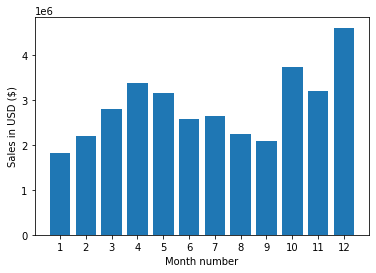

In [32]:
months = range(1, 13)
plt.bar(months, results['Sales']) # months on x-axis, results['Sales'] on y-axis

plt.xticks(months)

plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')

plt.show()

### Question 2: What city had the highest number of sales?

In [42]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


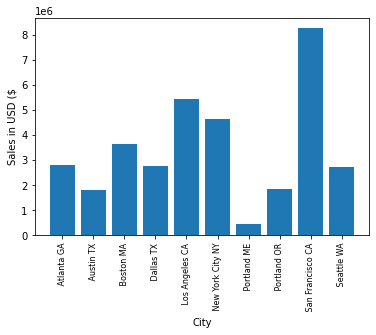

In [49]:
cities = all_data['City'].unique()
# bc x and y data are not in the same order (for line above order doesn't matter but for the y col results['Sales], the order does matter)
# so will use a list comprehension to fix this issue- this will get cities in same order as they were when we did the groupby sum
cities =  [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8)

plt.xlabel('City')
plt.ylabel('Sales in USD ($')

plt.show()

### Question 3: What time should we display advertisements to maximize the likelihood of customers' buying product?

In [50]:
# going to convert 'Order Date' column to date time object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [51]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


In [52]:
# now will add hour column to df
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14


In [53]:
# adding this column as well (will help w creating the line graph)
all_data['Count'] = 1
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas TX,8,1


In [54]:
# just for reference so next cell makes sense
# counting num of rows by each hour (after we do the groupby) ie. num of occurences of orders for that specific hour
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Count
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


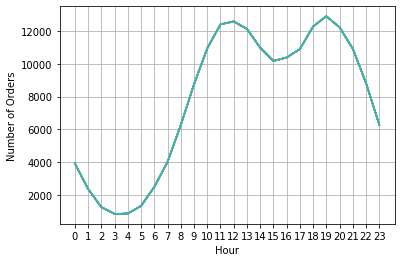

In [59]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count()) 

plt.xticks(hours)
plt.grid() # adding grid to background so graph is easier to read

plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.show()

# So target ads around 11 am (11:00) or 7 pm (19:00)

### Question 4: What products are most often sold together?

In [60]:
# If 2 products have the same Order ID, that means those products were bought together
# We first need to find duplicate values in our dataframe
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,1
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,1
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,1
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,1
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,1
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,1
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,1
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,1


In [72]:
# want to now create a new column w products w the same order id in the same line
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(3)

<ipython-input-72-c995572c7278>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,1,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,1,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,1,"Google Phone,USB-C Charging Cable"


In [75]:
# now drop rows w duplicate values
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(3)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [76]:
# now will count unique pairs of products and create a dict from that
# look at video's notebook for stack overflow reference on how to do this
# will be using itertools and collections

from itertools import combinations
from collections import Counter

count = Counter()

# want to use Grouped to get our 'sublist' (from stackoverflow link)
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [77]:
count.most_common(5) # so we can see iPhone and Lightning Charging Cable are most commonly bought together

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

In [79]:
# or even easier way to read

for key, value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


In [83]:
# now suppose we want to see what THREE items were most commonly bought tg
# then change row_list, 2 to row_list, 3

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count.most_common(5)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33)]

### Question 5: What product sold the most? Why did it sell the most?

In [84]:
# to find out what product sold the most is we need to sum up quantity ordered based on grouping by the product
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Count
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,4800


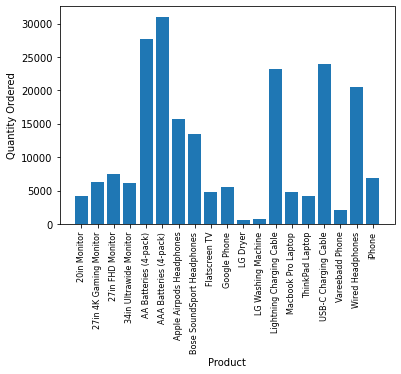

In [88]:
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = 'vertical', size = 8)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

In [89]:
# will now overlay above graph with prices of each of the products to see if products that sold the most had some of the lowest prices
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-99-d8c13a618934>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


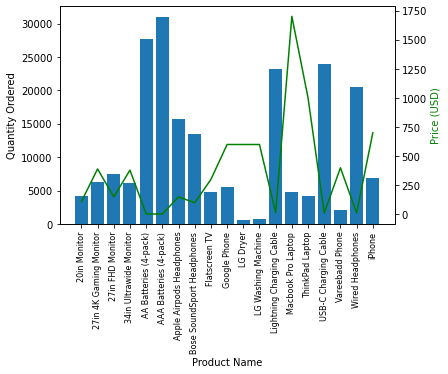

In [99]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

ax2.set_ylabel('Price (USD)', color = 'g')

plt.show()